In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mediacompany.csv")
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [3]:
df.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [5]:
df.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [6]:
df["Date"] = pd.to_datetime(df["Date"]).dt.date
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [7]:
from datetime import date

d0 = date(2017, 2, 28)
d1 = df.Date
#print(d0, d1)
delta = d1 - d0
df["day"] = delta
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [8]:
df["day"] = df["day"].astype(str)
df["day"] = df["day"].map(lambda x: x[0:2])
df["day"] = df["day"].astype(int)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


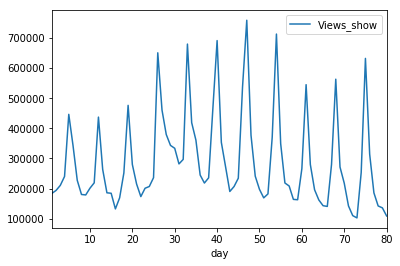

In [9]:
df.plot.line(x = "day", y = "Views_show")

Text(0,0.5,'Views Show')

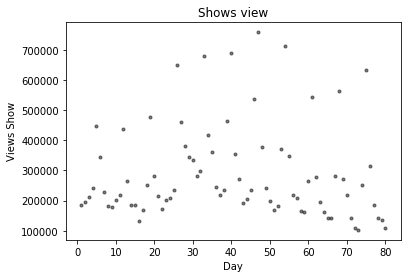

In [10]:
colors = (0,0,0)
area = np.pi * 3
plt.scatter(df.day, df.Views_show, s = area, c= colors, alpha=0.5)
plt.title("Shows view")
plt.xlabel("Day")
plt.ylabel("Views Show")

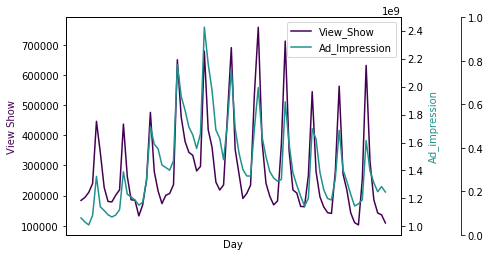

In [11]:
fig = plt.figure()
host = fig.add_subplot(111)
par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(0.9)

p1, = host.plot(df.day, df.Views_show, color = color1, label= "View_Show")
p2, = par1.plot(df.day, df.Ad_impression, color = color2, label= "Ad_Impression")

lns = [p1, p2]
host.legend(handles=lns, loc="best")

par2.spines["right"].set_position(("outward", 60))
par2.xaxis.set_ticks([])

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches="tight")

In [12]:
df["weekday"] = (df["day"] +3)%7
df.weekday.replace(0, 7, inplace= True)
df["weekday"] = df["weekday"].astype(int)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [13]:
X = df[["Visitors", "weekday"]]
y = df["Views_show"]

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
import statsmodels.api as sm

X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
model1.summary()

C:\Python\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           8.01e-12
Time:                        11:54:43   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.720   -2.52e+05    1.75e+05
Visitors       0.2787      0.057      4.911      0.000       0.166       0.392
weekday    -3.591e+04   6591.205     -5.448      0.000    -4.9e+04   -2.28e+04
==============================================================================
Omnibus:                        2.684   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.653
Skew:                           0.423   Prob(JB):                        0.265
Kurtosis:                       2.718   Cond. No.                     1.46e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
def cond(i):
    if i%7 == 5: return 1
    elif i%7 == 4: return 1
    else: return 0
    return i

df["weekend"] = [cond(i) for i in df["day"]]
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


In [17]:
X = df[["Visitors", "weekend"]]
y = df["Views_show"]

In [18]:
X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           2.51e-12
Time:                        11:54:43   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.384   -2.89e+05    1.13e+05
Visitors       0.1934      0.061      3.160      0.002       0.071       0.315
weekend     1.807e+05   3.15e+04      5.740      0.000    1.18e+05    2.43e+05
==============================================================================
Omnibus:                        1.302   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.367
Skew:                           0.270   Prob(JB):                        0.505
Kurtosis:                       2.656   Cond. No.                     1.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
X = df[["Visitors", "weekend", "Character_A"]]
y = df["Views_show"]

In [20]:
X = sm.add_constant(X)
model3 = sm.OLS(y, X).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           1.53e-14
Time:                        11:54:44   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
df["Lag_Views"] = np.roll(df["Views_show"], 1)
df.Lag_Views.replace(108961,0, inplace= True)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


In [22]:
X = df[["Visitors", "weekend", "Character_A", "Lag_Views"]]
y = df["Views_show"]

In [23]:
X = sm.add_constant(X)
model4 = sm.OLS(y, X).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           3.16e-21
Time:                        11:54:44   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      0.689   -1.78e+05    1.18e+05
Visitors        0.0659      0.047      1.394      0.167      -0.028       0.160
weekend      2.273e+05    2.4e+04      9.467      0.000    1.79e+05    2.75e+05
Character_A  5.527e+04   2.01e+04      2.748      0.008    1.52e+04    9.53e+04
Lag_Views       0.4317      0.065      6.679      0.000       0.303       0.560
==============================================================================
Omnibus:                        1.425   Durbin-Watson:                   2.626
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                0.821
Skew:                          -0.130   Prob(JB):                        0.663
Kurtosis:                       3.423   Cond. No.                     1.44e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

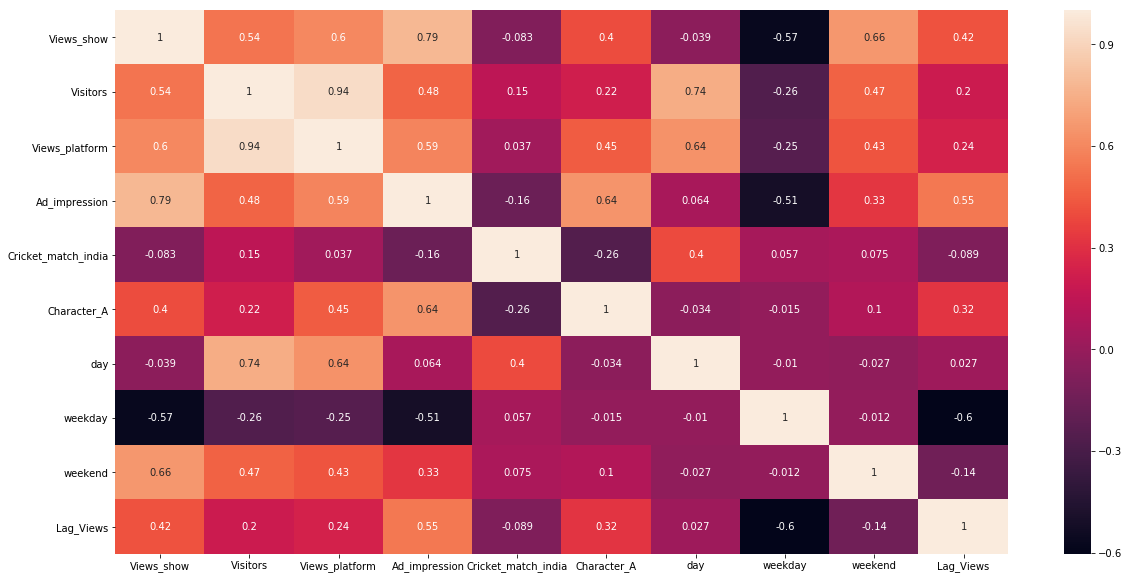

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)

In [25]:
X = df[["weekend", "Character_A", "Views_platform"]]
y = df["Views_show"]

In [26]:
X = sm.add_constant(X)
model5 = sm.OLS(y, X).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           3.59e-15
Time:                        11:54:45   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.208      0.231   -3.19e+05    7.81e+04
weekend         1.781e+05   2.78e+04      6.410      0.000    1.23e+05    2.33e+05
Character_A     7.062e+04    2.6e+04      2.717      0.008    1.89e+04    1.22e+05
Views_platform     0.1507      0.048      3.152      0.002       0.055       0.246
==============================================================================
Omnibus:                        4.279   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                2.153
Skew:                           0.061   Prob(JB):                        0.341
Kurtosis:                       2.206   Cond. No.                     2.03e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
X = df[["weekend", "Character_A", "Visitors"]]
y = df["Views_show"]
X = sm.add_constant(X)
model6 = sm.OLS(y, X).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           1.53e-14
Time:                        11:54:45   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
X = df[["weekend", "Character_A", "Visitors", "Ad_impression"]]
y = df["Views_show"]
X = sm.add_constant(X)
model7 = sm.OLS(y, X).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           1.10e-25
Time:                        11:54:46   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067      0.000   -4.22e+05   -1.45e+05
weekend        1.485e+05   2.04e+04      7.296      0.000    1.08e+05    1.89e+05
Character_A   -2.934e+04   2.16e+04     -1.356      0.179   -7.24e+04    1.38e+04
Visitors          0.0144      0.042      0.340      0.735      -0.070       0.099
Ad_impression     0.0004   3.96e-05      9.090      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.808   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.007
Skew:                           0.476   Prob(JB):                        0.135
Kurtosis:                       3.545   Cond. No.                     1.32e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X = df[["weekend", "Character_A", "Ad_impression"]]
y = df["Views_show"]
X = sm.add_constant(X)
model8 = sm.OLS(y, X).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           1.05e-26
Time:                        11:54:46   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
weekend         1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
Character_A    -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
Ad_impression     0.0004   3.69e-05      9.875      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
df["ad_impression_million"] = df["Ad_impression"]/1000000

In [31]:
X = df[["weekend", "Character_A", "Cricket_match_india", "ad_impression_million"]]
y = df["Views_show"]
X = sm.add_constant(X)
model9 = sm.OLS(y, X).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           1.02e-25
Time:                        11:54:46   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+05    4.8e+04     -5.484      0.000   -3.59e+05   -1.68e+05
weekend                1.521e+05    1.9e+04      7.987      0.000    1.14e+05     1.9e+05
Character_A           -3.196e+04   2.19e+04     -1.457      0.149   -7.57e+04    1.17e+04
Cricket_match_india   -1.396e+04   2.74e+04     -0.510      0.612   -6.85e+04    4.06e+04
ad_impression_million   363.7938     37.113      9.802      0.000     289.861     437.727
==============================================================================
Omnibus:                        5.270   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.560
Skew:                           0.468   Prob(JB):                        0.102
Kurtosis:                       3.701   Cond. No.                     9.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
X = df[["weekend", "Character_A", "ad_impression_million"]]
y = df["Views_show"]
X = sm.add_constant(X)
model10 = sm.OLS(y, X).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           1.05e-26
Time:                        11:54:46   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
weekend                 1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
Character_A            -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
ad_impression_million   364.4670     36.909      9.875      0.000     290.957     437.977
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
X = df[["weekend", "Character_A", "ad_impression_million"]]
X = sm.add_constant(X)
pred_view = model10.predict(X)

C:\Python\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [43]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(df.Views_show, pred_view), r2_score(df.Views_show, pred_view))

4677651616.2534075 0.802643446857565


Text(0.5,1,'Actual and Predicted')

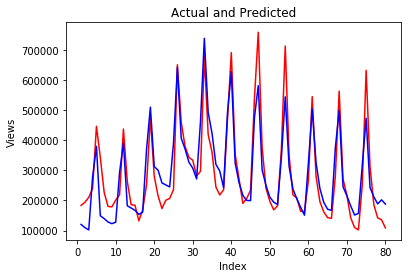

In [44]:
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c, df.Views_show, color = "Red", linestyle = "-")
plt.plot(c, pred_view, color = "Blue", linestyle = "-")
plt.xlabel("Index")
plt.ylabel("Views")
plt.title("Actual and Predicted")

Text(0.5,1,'Error')

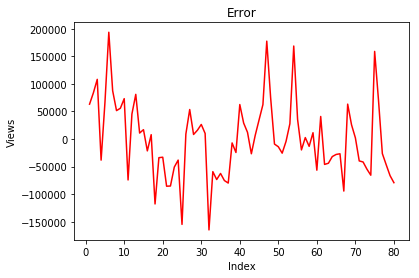

In [45]:
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c, df.Views_show - pred_view, color = "Red", linestyle = "-")
plt.xlabel("Index")
plt.ylabel("Views")
plt.title("Error")

In [38]:
X = df[["weekend", "Character_A", "ad_impression_million"]]
X = sm.add_constant(X)
pred_view = model6.predict(X)

C:\Python\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [39]:
print(mean_squared_error(df.Views_show, pred_view), r2_score(df.Views_show, pred_view))

74113970295.19772 -2.1269703084208156


Text(0.5,1,'Actual and Predicted')

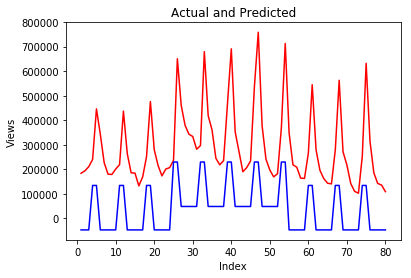

In [40]:
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c, df.Views_show, color = "Red", linestyle = "-")
plt.plot(c, pred_view, color = "Blue", linestyle = "-")
plt.xlabel("Index")
plt.ylabel("Views")
plt.title("Actual and Predicted")

Text(0.5,1,'Error')

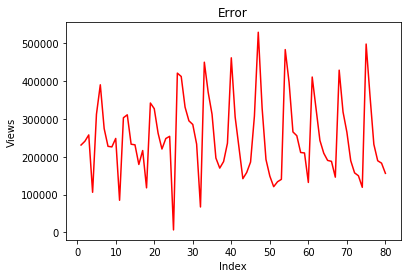

In [41]:
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c, df.Views_show - pred_view, color = "Red", linestyle = "-")
plt.xlabel("Index")
plt.ylabel("Views")
plt.title("Error")